In [1]:
#include <iostream>
#include <string>
#include <stdio.h>

In [2]:
TFile *f = TFile::Open("Tracks_Clusters.root"); 

In [3]:
TTree *tree = (TTree*) f->Get("JetRecoTree");
tree->Print()

******************************************************************************
*Tree    :JetRecoTree: JetRecoTree                                            *
*Entries :   102900 : Total =      3334789039 bytes  File  Size = 2227126936 *
*        :          : Tree compression factor =   1.50                       *
******************************************************************************
*Br    0 :EventNumber : EventNumber/l                                        *
*Entries :   102900 : Total  Size=     836872 bytes  File Size  =     448624 *
*Baskets :      127 : Basket Size=       7219 bytes  Compression=   1.86     *
*............................................................................*
*Br    1 :RunNumber : RunNumber/l                                            *
*Entries :   102900 : Total  Size=     836610 bytes  File Size  =      20416 *
*Baskets :      127 : Basket Size=       7219 bytes  Compression=  40.84     *
*..................................................

### 1. Compare the leading truth jet pT with the leading reco jet pT, with and without event weights. 

In [4]:
float evtw = -1;
vector<float> *reco_R4_pt;
vector<float> *truth_R4_pt;

tree->SetBranchAddress("EventWeight", &evtw);
tree->SetBranchAddress("RecoJets_R4_pt", &reco_R4_pt);
tree->SetBranchAddress("TruthJets_R4_pt", &truth_R4_pt);

TH1F *hist_leadreco_pt = new TH1F("Lead Reco-jet","Leading jet pT; pT(GeV);Events",50,10,200);
TH1F *hist_leadtruth_pt = new TH1F("Lead Truth-jet","Leading Jet pT; pT(GeV);Events",50,10,200);
TH1F *hist_reco_pt = new TH1F("Reco-jet","jet pT; pT(GeV);Events",50,10,200);
TH1F *hist_truth_pt = new TH1F("Truth-jet","Jet pT; pT(GeV);Events",50,10,200);

TCanvas *canvas = new TCanvas("Canvas","",800,600);

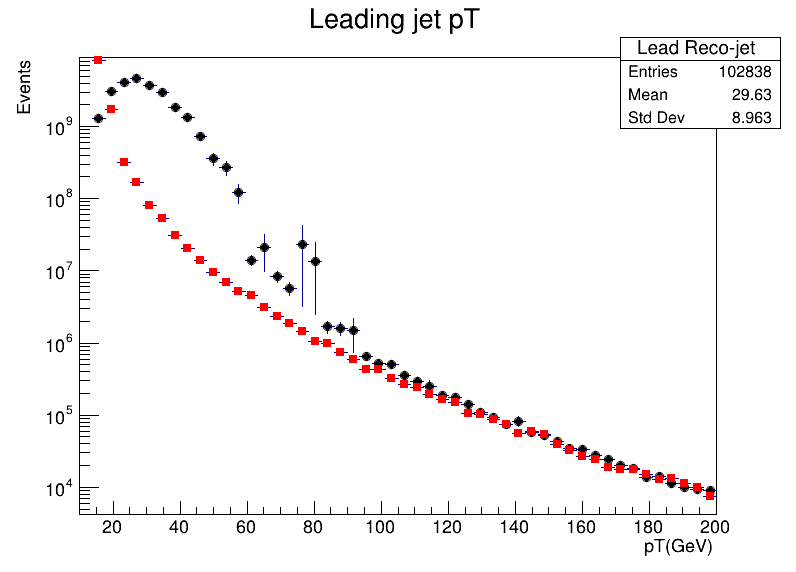

In [5]:
int nentries, nbytes, i;
nentries = (Int_t)tree->GetEntries();

for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);   
    if(reco_R4_pt->size()>0){
    hist_leadreco_pt->Fill(reco_R4_pt->at(0)/1000.,evtw);  
    }
    if(truth_R4_pt->size()>0){
    hist_leadtruth_pt->Fill(truth_R4_pt->at(0)/1000.,evtw);  
    }
}

hist_leadreco_pt->SetMarkerStyle(20);
hist_leadtruth_pt->SetMarkerColor(kRed);
hist_leadreco_pt->Draw("");
hist_leadtruth_pt->SetMarkerStyle(21);
hist_leadtruth_pt->Draw("same");
canvas->SetLogy();
canvas->Draw();

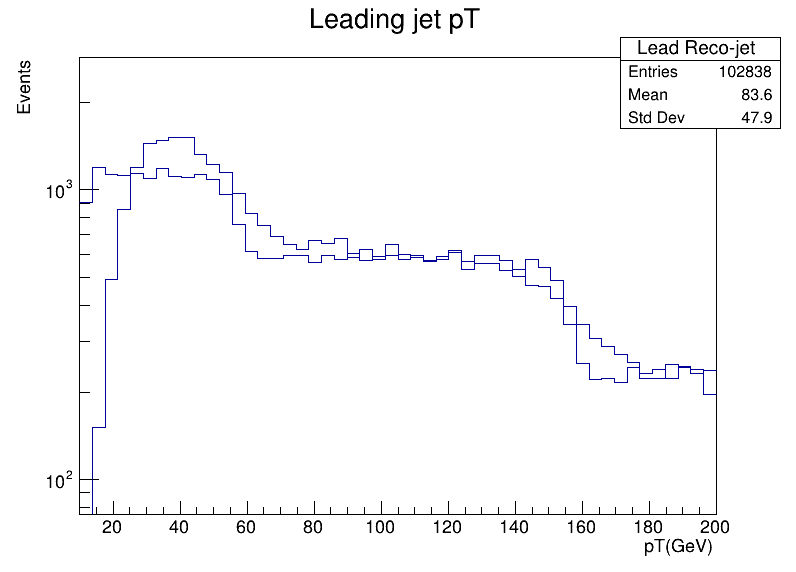

In [5]:
int nentries, nbytes, i;
nentries = (Int_t)tree->GetEntries();

for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);   
    if(reco_R4_pt->size()>0){
    hist_leadreco_pt->Fill(reco_R4_pt->at(0)/1000.);  
    }
    if(truth_R4_pt->size()>0){
    hist_leadtruth_pt->Fill(truth_R4_pt->at(0)/1000.);  
    }
}

hist_leadreco_pt->SetMarkerStyle(20);
hist_leadtruth_pt->SetMarkerColor(kRed);
hist_leadreco_pt->Draw("");
hist_leadtruth_pt->SetMarkerStyle(21);
hist_leadtruth_pt->Draw("same");
canvas->SetLogy();
canvas->Draw();

### 2. Repeat for all jets pT.

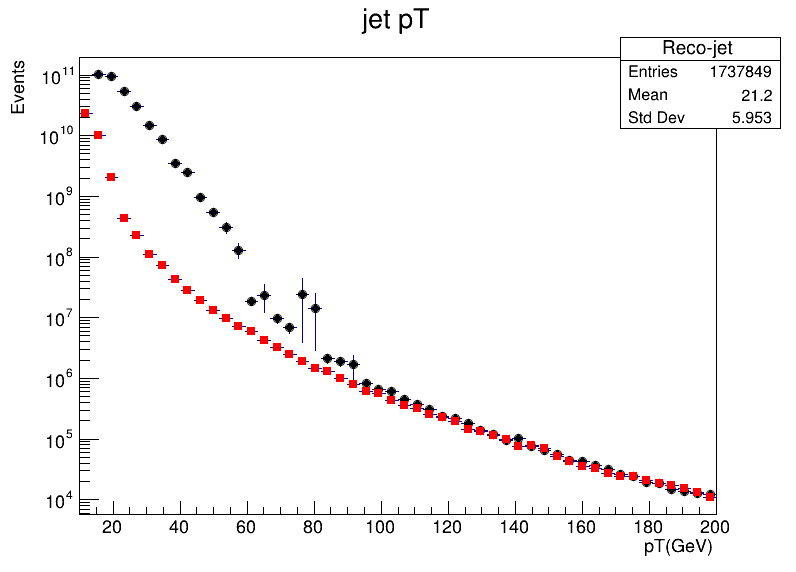

In [7]:
int nentries, nbytes, i;
nentries = (Int_t)tree->GetEntries();

for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);   
    if(reco_R4_pt->size()>0){
    hist_leadreco_pt->Fill(reco_R4_pt->at(0)/1000.,evtw);  
    for(int j=0; j<reco_R4_pt->size(); j++){
        hist_reco_pt->Fill(reco_R4_pt->at(j)/1000.,evtw);     
    }
    }
    if(truth_R4_pt->size()>0){
    hist_leadtruth_pt->Fill(truth_R4_pt->at(0)/1000.,evtw);  
    for(int j=0; j<truth_R4_pt->size(); j++){
        hist_truth_pt->Fill(truth_R4_pt->at(j)/1000.,evtw);     
    }
    }
}

hist_reco_pt->SetMarkerStyle(20);
hist_truth_pt->SetMarkerColor(kRed);
hist_reco_pt->Draw("");
hist_truth_pt->SetMarkerStyle(21);
hist_truth_pt->Draw("same");
canvas->SetLogy();
canvas->Draw();

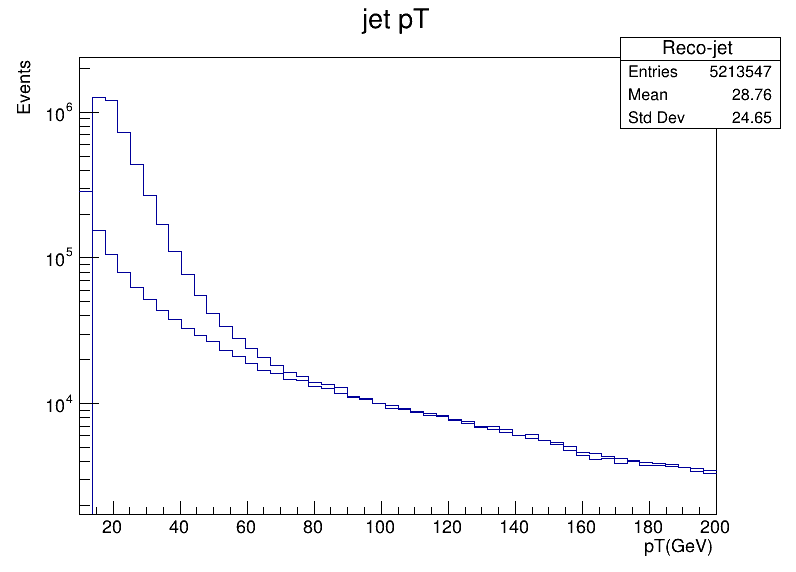

In [7]:
int nentries, nbytes, i;
nentries = (Int_t)tree->GetEntries();

for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);   
    if(reco_R4_pt->size()>0){
    hist_leadreco_pt->Fill(reco_R4_pt->at(0)/1000.,1);  
    for(int j=0; j<reco_R4_pt->size(); j++){
        hist_reco_pt->Fill(reco_R4_pt->at(j)/1000.,1);     
    }
    }
    if(truth_R4_pt->size()>0){
    hist_leadtruth_pt->Fill(truth_R4_pt->at(0)/1000.,1);  
    for(int j=0; j<truth_R4_pt->size(); j++){
        hist_truth_pt->Fill(truth_R4_pt->at(j)/1000.,1);     
    }
    }
}

hist_reco_pt->SetMarkerStyle(20);
hist_truth_pt->SetMarkerColor(kRed);
hist_reco_pt->Draw("");
hist_truth_pt->SetMarkerStyle(21);
hist_truth_pt->Draw("same");
canvas->SetLogy();
canvas->Draw();

### 3. Make plots for reco and truth jet pT vs. pileup. Interpret your results.

In [5]:
UInt_t npv = -1;
tree->SetBranchAddress("NPV", &npv);

float mu = -1;
tree->SetBranchAddress("mu_average", &mu);

TH2F *hist_jetpt_npv = new TH2F("Reco-jet pT vs. NPV",";NPV; jet pT",50,1,50, 20, 0, 200);
TProfile *prof_jetpt_npv = new TProfile("Profile Reco-jet pT vs. NPV",";NPV; jet pT",50,1,50, 0, 200);
TH2F *hist_jetpt_npv_truth = new TH2F("Truth-jet pT vs. NPV",";NPV; jet pT",50,1,50, 20, 0, 200);
TProfile *prof_jetpt_npv_truth = new TProfile("Profile Truth-jet pT vs. NPV",";NPV; jet pT",50,1,50, 0, 200);

TCanvas *canvas2 = new TCanvas("Canvas2","",800,600);

In [6]:
int nentries, nbytes, i;
nentries = (Int_t)tree->GetEntries();

for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);

    if(reco_R4_pt->size()!=0 && reco_R4_pt->at(0)>20000.){
        for(int j=0; j<reco_R4_pt->size(); j++){
        hist_jetpt_npv->Fill(reco_R4_pt->at(j)/1000.,npv,evtw);
        prof_jetpt_npv->Fill(reco_R4_pt->at(j)/1000.,npv,evtw);
        }
    }
}

for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);

    if (truth_R4_pt->size()!=0 && truth_R4_pt->at(0)>20000.){
        for(int j=0; j<truth_R4_pt->size(); j++){
        hist_jetpt_npv_truth->Fill(truth_R4_pt->at(j)/1000.,npv,evtw);
        prof_jetpt_npv_truth->Fill(truth_R4_pt->at(j)/1000.,npv,evtw);

        }
    }
}

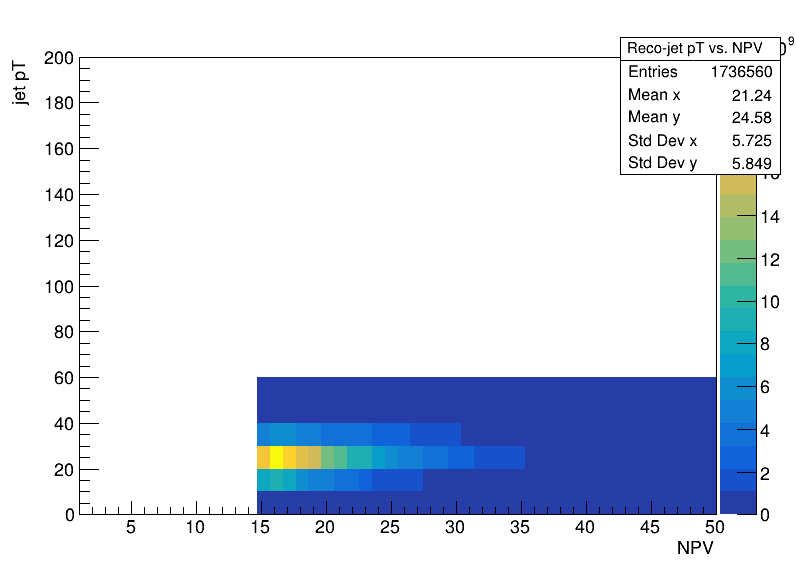

In [7]:
hist_jetpt_npv->Draw("colz");
canvas2->Draw();

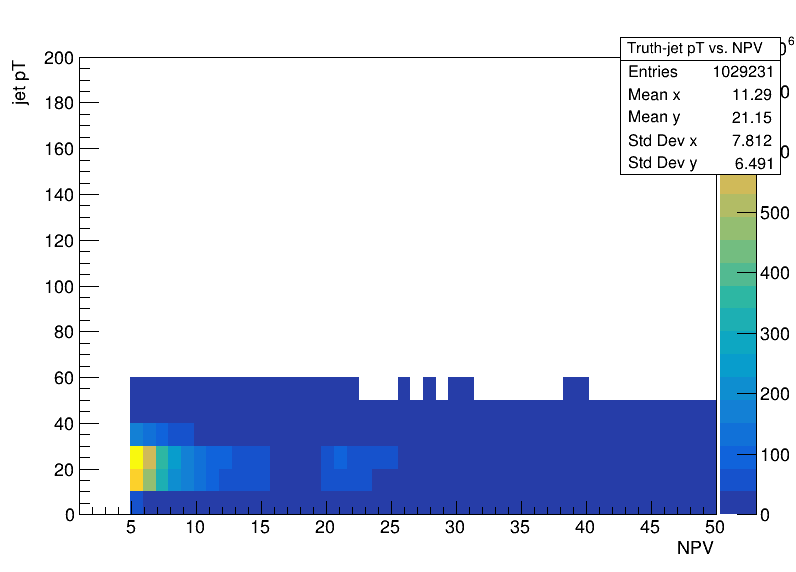

In [8]:
hist_jetpt_npv_truth->Draw("colz");
canvas2->Draw();

### Se observa una distribución muy parecida de pT para ambos casos. Sin embargo, la distribución de NPV cambia considerablemente para los datos reconstruidos en comparación con los datos truth level desplazandose hacia un mayor numero de vertices principales 10 unidades. Esto se debe a la contaminación que se tiene en los datos reconstruidos, lo cual puede en algunos casos introducir vertices que no corresponden al proceso que se está estudiando sino de procesos externos o incluso eventos pasados.

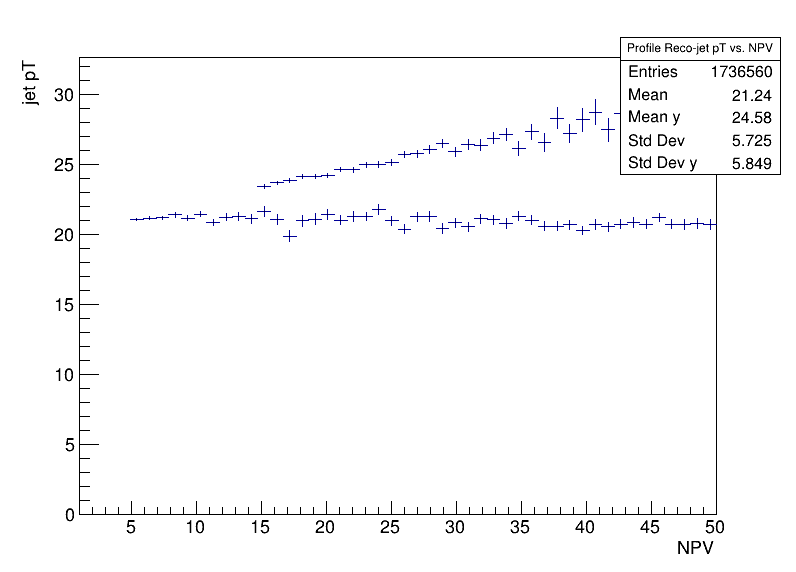

In [9]:
prof_jetpt_npv->Draw("");
prof_jetpt_npv_truth->Draw("same");
canvas2->Draw();

### El perfil de los datos en truth level se observa estable en pT de aproximadamente 21 para todos los NPV entre 5 y 50 mientras que el perfil de los datos reconstruidos muestra un mayor jet pT para numeros mayores de vertices principales siguiendo una función aparentemente lineal. Igual que para el caso anterior, esto puede explicarse debido a la contaminación que tienen los datos reconstruidos. 

### 4. Use a |JVF|>0.5 cut to compare the leading jet pT for truth jets, reco jets (w.o. the cut), and reco jets (with the cut) 

In [4]:
float evtw = -1;
vector<float> *reco_R4_pt;
vector<float> *truth_R4_pt;
vector<float> *reco_R4_jvf;
vector<float> *truth_R4_jvf;

tree->SetBranchAddress("RecoJets_R4_jvf", &reco_R4_jvf);
tree->SetBranchAddress("EventWeight", &evtw);
tree->SetBranchAddress("RecoJets_R4_pt", &reco_R4_pt);
tree->SetBranchAddress("TruthJets_R4_pt", &truth_R4_pt);

TH1F *hist_leadtruth_pt = new TH1F("Lead Truth-jet","Leading jet pT; pT(GeV);Events",50,10,200);
TH1F *hist_leadreco_pt = new TH1F("Lead Reco-jet","Leading jet pT; pT(GeV);Events",50,10,200);
TH1F *hist_leadreco_pt_cut = new TH1F("Lead Reco-jet with cut","Leading jet pT; pT(GeV);Events",50,10,200);


TCanvas *canvas = new TCanvas("Canvas","",800,600);

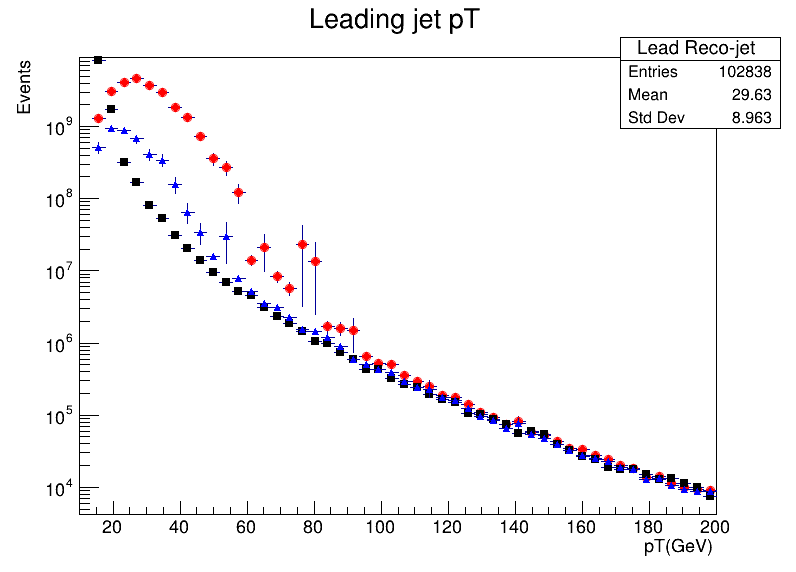

In [5]:
int nentries, nbytes, i;
nentries = (Int_t)tree->GetEntries();

for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);   
    if(reco_R4_pt->size()>0){
    if(reco_R4_jvf->at(0)>0.5){hist_leadreco_pt_cut->Fill(reco_R4_pt->at(0)/1000.,evtw);}
    if(reco_R4_jvf->at(0)<-0.5){hist_leadreco_pt_cut->Fill(reco_R4_pt->at(0)/1000.,evtw);}
    }
}

for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);   
    if(reco_R4_pt->size()>0){
    hist_leadreco_pt->Fill(reco_R4_pt->at(0)/1000.,evtw);  
    }
    if(truth_R4_pt->size()>0){
    hist_leadtruth_pt->Fill(truth_R4_pt->at(0)/1000.,evtw);  
    }
}

hist_leadreco_pt->SetMarkerStyle(20);
hist_leadreco_pt->Draw("");
hist_leadtruth_pt->SetMarkerStyle(21);
hist_leadreco_pt->SetMarkerColor(kRed);
hist_leadtruth_pt->Draw("same");
hist_leadreco_pt_cut->SetMarkerStyle(22);
hist_leadreco_pt_cut->SetMarkerColor(kBlue);
hist_leadreco_pt_cut->Draw("same");
canvas->SetLogy();
canvas->Draw();

### 5. Repeat the same plots and comparisons with "Track-jets" and verify that they are stable against pileup

In [5]:
vector<float> *track_R4_pt;

tree->SetBranchAddress("TrackJets_R4_pt", &track_R4_pt);

TH1F *hist_leadtrack_pt = new TH1F("Lead Track-jet","Leading jet pT; pT(GeV);Events",50,10,200);

In [7]:
int nentries, nbytes, i;
nentries = (Int_t)tree->GetEntries();

for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);   
    if(track_R4_pt->size()>0){
    hist_leadtrack_pt->Fill(track_R4_pt->at(0)/1000.,evtw);  
    }
}

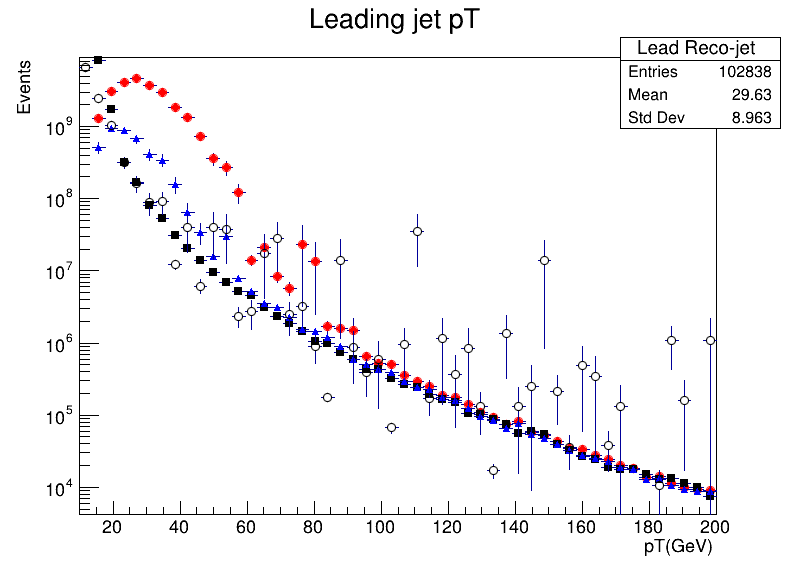

In [8]:
hist_leadreco_pt->SetMarkerStyle(20);
hist_leadreco_pt->SetMarkerColor(kRed);
hist_leadreco_pt->Draw("");
hist_leadtruth_pt->SetMarkerStyle(21);
hist_leadtruth_pt->Draw("same");
hist_leadreco_pt_cut->SetMarkerStyle(22);
hist_leadreco_pt_cut->SetMarkerColor(kBlue);
hist_leadreco_pt_cut->Draw("same");
hist_leadtrack_pt->SetMarkerStyle(24);
hist_leadtrack_pt->Draw("same");
canvas->SetLogy();
canvas->Draw();

### 6. Repeat for track-jets and make a plot comparing three cases: reco-jets with and without the JVF cut, and track-jets

In [6]:
vector<float> *reco_R4_eta;
vector<float> *reco_R4_phi;
vector<float> *reco_R4_m;

vector<float> *truth_R4_eta;
vector<float> *truth_R4_phi;
vector<float> *truth_R4_m;

vector<float> *track_R4_eta;
vector<float> *track_R4_phi;
vector<float> *track_R4_m;

tree->SetBranchAddress("RecoJets_R4_eta", &reco_R4_eta);
tree->SetBranchAddress("RecoJets_R4_phi", &reco_R4_phi);
tree->SetBranchAddress("RecoJets_R4_m", &reco_R4_m);
tree->SetBranchAddress("TruthJets_R4_eta", &truth_R4_eta);
tree->SetBranchAddress("TruthJets_R4_phi", &truth_R4_phi);
tree->SetBranchAddress("TruthJets_R4_m", &truth_R4_m);
tree->SetBranchAddress("TrackJets_R4_eta", &track_R4_eta);
tree->SetBranchAddress("TrackJets_R4_phi", &track_R4_phi);
tree->SetBranchAddress("TrackJets_R4_m", &track_R4_m);

In [6]:
TH1F *hist_DR_reco_truth = new TH1F("Delta R reco","Delta R; #Delta R; Events",20,0,2);
TH1F *hist_DR_reco_cut_truth = new TH1F("Delta R reco with cut","Delta R; #Delta R; Events",20,0,2);
TH1F *hist_DR_track_truth = new TH1F("Delta R track","Delta R; #Delta R; Events",20,0,2);

In [11]:
int nentries, nbytes, i;
nentries = (Int_t)tree->GetEntries();

for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);

    if(truth_R4_pt->size()!=0 && truth_R4_pt->at(0)>20000.){
    TLorentzVector truthJet;
    truthJet.SetPtEtaPhiM(truth_R4_pt->at(0),truth_R4_eta->at(0),truth_R4_phi->at(0),truth_R4_m->at(0));   
        
    if(reco_R4_pt->size()!=0 && fabs(reco_R4_jvf->at(0))>0.5){
    TLorentzVector reco_cutJet;
    reco_cutJet.SetPtEtaPhiM(reco_R4_pt->at(0),reco_R4_eta->at(0),reco_R4_phi->at(0),reco_R4_m->at(0));        
 
        //Plot the Delta R
        hist_DR_reco_cut_truth->Fill(truthJet.DeltaR(reco_cutJet),evtw);
    }
        
    if(reco_R4_pt->size()!=0){
    TLorentzVector recoJet;
    recoJet.SetPtEtaPhiM(reco_R4_pt->at(0),reco_R4_eta->at(0),reco_R4_phi->at(0),reco_R4_m->at(0));        
 
        //Plot the Delta R
        hist_DR_reco_truth->Fill(truthJet.DeltaR(recoJet),evtw);
    }
        
    if(track_R4_pt->size()!=0){
    TLorentzVector trackJet;
    trackJet.SetPtEtaPhiM(track_R4_pt->at(0),track_R4_eta->at(0),track_R4_phi->at(0),track_R4_m->at(0));        
 
        //Plot the Delta R
        hist_DR_track_truth->Fill(truthJet.DeltaR(trackJet),evtw);
    }
        
    }
}


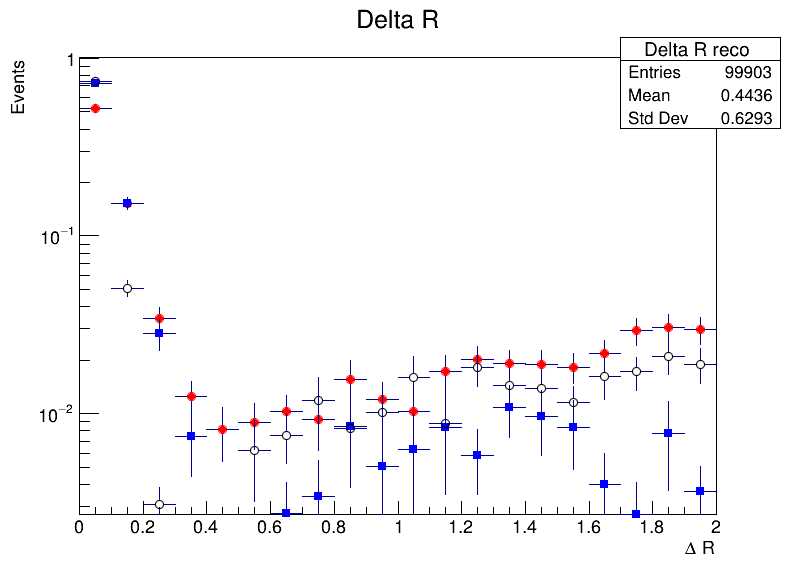

In [19]:
hist_DR_reco_truth->Scale(1/hist_DR_reco_truth->Integral());
hist_DR_reco_truth->SetMarkerStyle(20);
hist_DR_reco_truth->SetMarkerColor(kRed);
hist_DR_reco_truth->DrawNormalized("");
hist_DR_reco_cut_truth->Scale(1/hist_DR_reco_truth->Integral());
hist_DR_reco_cut_truth->SetMarkerStyle(21);
hist_DR_reco_cut_truth->SetMarkerColor(kBlue);
hist_DR_reco_cut_truth->DrawNormalized("same");
hist_DR_track_truth->Scale(1/hist_DR_reco_truth->Integral());
hist_DR_track_truth->SetMarkerStyle(24);
hist_DR_track_truth->DrawNormalized("same");
canvas->Draw();

### 7. Plot the response: For matched jets (use DeltaR<0.3), plot pTjet/pTtruth for 3 cases: truth_pT>20 GeV, 100 GeV, 500 GeV. Do this for track jets and reco jets (two plots).

In [5]:
float evtw = -1;
vector<float> *reco_R4_pt;
vector<float> *truth_R4_pt;

vector<float> *reco_R4_eta;
vector<float> *reco_R4_phi;
vector<float> *reco_R4_m;

vector<float> *truth_R4_eta;
vector<float> *truth_R4_phi;
vector<float> *truth_R4_m;

vector<float> *track_R4_eta;
vector<float> *track_R4_phi;
vector<float> *track_R4_m;

TLorentzVector truthJet;
TLorentzVector recoJet;
TLorentzVector reco_cutJet;
TLorentzVector trackJet;

tree->SetBranchAddress("EventWeight", &evtw);
tree->SetBranchAddress("RecoJets_R4_pt", &reco_R4_pt);
tree->SetBranchAddress("TruthJets_R4_pt", &truth_R4_pt);
tree->SetBranchAddress("RecoJets_R4_eta", &reco_R4_eta);
tree->SetBranchAddress("RecoJets_R4_phi", &reco_R4_phi);
tree->SetBranchAddress("RecoJets_R4_m", &reco_R4_m);
tree->SetBranchAddress("TruthJets_R4_eta", &truth_R4_eta);
tree->SetBranchAddress("TruthJets_R4_phi", &truth_R4_phi);
tree->SetBranchAddress("TruthJets_R4_m", &truth_R4_m);
tree->SetBranchAddress("TrackJets_R4_eta", &track_R4_eta);
tree->SetBranchAddress("TrackJets_R4_phi", &track_R4_phi);
tree->SetBranchAddress("TrackJets_R4_m", &track_R4_m);

In [6]:
TH1F *hist_response_reco_truth = new TH1F("Response reco","Response; Response; Events",20,0,2);
TH1F *hist_response_reco_cut_truth = new TH1F("Response reco with cut","Response; Response; Events",20,0,2);
TH1F *hist_response_track_truth = new TH1F("Response track","Response; Response; Events",20,0,2);

In [ ]:
truthJet.SetPtEtaPhiM(truth_R4_pt->at(0),truth_R4_eta->at(0),truth_R4_phi->at(0),truth_R4_m->at(0)); 
recoJet.SetPtEtaPhiM(reco_R4_pt->at(0),reco_R4_eta->at(0),reco_R4_phi->at(0),reco_R4_m->at(0)); 
reco_cutJet.SetPtEtaPhiM(reco_R4_pt->at(0),reco_R4_eta->at(0),reco_R4_phi->at(0),reco_R4_m->at(0));  
trackJet.SetPtEtaPhiM(track_R4_pt->at(0),track_R4_eta->at(0),track_R4_phi->at(0),track_R4_m->at(0));

In [ ]:
int nentries, nbytes, i;
nentries = (Int_t)tree->GetEntries(); 

for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);
    
    if(truth_R4_pt->size()!=0 && truth_R4_pt->at(0)>20000.){ 
        if(reco_R4_pt->size()!=0 && fabs(reco_R4_jvf->at(0))>0.5 && truthJet.DeltaR(reco_cutJet)<0.3){        
        hist_response_reco_cut_truth->Fill(reco_R4_pt->at(0)/truth_R4_pt->at(0),evtw);}
        if(reco_R4_pt->size()!=0 && truthJet.DeltaR(recoJet)<0.3){
        hist_response_reco_truth->Fill(reco_R4_pt->at(0)/truth_R4_pt->at(0),evtw);}
        if(track_R4_pt->size()!=0 && truthJet.DeltaR(trackJet)<0.3){
        hist_response_track_truth->Fill(track_R4_pt->at(0)/truth_R4_pt->at(0),evtw);}       
    }
}


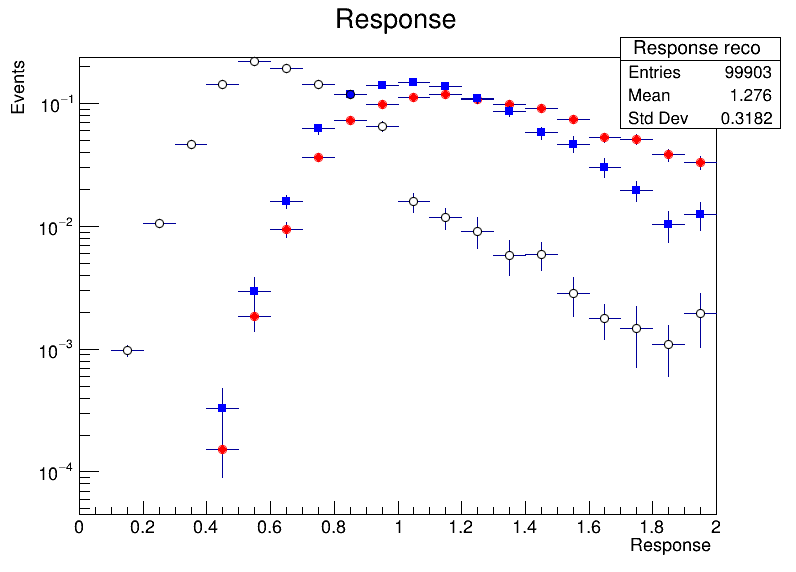

In [32]:
hist_response_reco_truth->Scale(1/hist_DR_reco_truth->Integral());
hist_response_reco_truth->SetMarkerStyle(20);
hist_response_reco_truth->SetMarkerColor(kRed);
hist_response_reco_truth->DrawNormalized("");
hist_response_reco_cut_truth->Scale(1/hist_DR_reco_truth->Integral());
hist_response_reco_cut_truth->SetMarkerStyle(21);
hist_response_reco_cut_truth->SetMarkerColor(kBlue);
hist_response_reco_cut_truth->DrawNormalized("same");
hist_response_track_truth->Scale(1/hist_DR_reco_truth->Integral());
hist_response_track_truth->SetMarkerStyle(24);
hist_response_track_truth->DrawNormalized("same");
canvas->Draw();

### 8. Investigate the Large-R jets: (a) Plot the leading jet pT for reco_R10 and reco_R10_Trimmed jets (b) Plot the leading jet pT for truth_R10 and truth_R10_Trimmed jets (c) Compare all plots. How can you explain the differences? (d) Make the same comparisson for the jet mass.

In [4]:
float evtw = -1;
vector<float> *reco_R10_pt;
vector<float> *reco_R10_Trimmed_pt;
vector<float> *truth_R10_pt;
vector<float> *truth_R10_Trimmed_pt;
vector<float> *reco_R10_m;
vector<float> *reco_R10_Trimmed_m;
vector<float> *truth_R10_m;
vector<float> *truth_R10_Trimmed_m;

tree->SetBranchAddress("EventWeight", &evtw);
tree->SetBranchAddress("RecoJets_R10_pt", &reco_R10_pt);
tree->SetBranchAddress("TruthJets_R10_pt", &truth_R10_pt);
tree->SetBranchAddress("RecoJets_R10_Trimmed_pt", &reco_R10_Trimmed_pt);
tree->SetBranchAddress("TruthJets_R10_Trimmed_pt", &truth_R10_Trimmed_pt);
tree->SetBranchAddress("RecoJets_R10_m", &reco_R10_m);
tree->SetBranchAddress("TruthJets_R10_m", &truth_R10_m);
tree->SetBranchAddress("RecoJets_R10_Trimmed_m", &reco_R10_Trimmed_m);
tree->SetBranchAddress("TruthJets_R10_Trimmed_m", &truth_R10_Trimmed_m);

TH1F *hist_leadtruthR10_pt = new TH1F("Lead Truth-jet for R10","Leading jet pT; pT(GeV);Events",50,10,200);
TH1F *hist_leadtruthR10_Trimmed_pt = new TH1F("Lead Truth-Trimmed-jet for R10","Leading jet pT; pT(GeV);Events",50,10,200);

TH1F *hist_leadrecoR10_pt = new TH1F("Lead Reco-jet for R10","Leading jet pT; pT(GeV);Events",50,10,200);
TH1F *hist_leadrecoR10_Trimmed_pt = new TH1F("Lead Reco-Trimmed-jet for R10","Leading jet pT; pT(GeV);Events",50,10,200);

TH1F *hist_leadrecotruthR10_pt = new TH1F("Comparisson of all plots","Leading jet pT; pT(GeV);Events",50,10,200);

TH1F *hist_leadtruthR10_m = new TH1F("Lead Truth-jet and Truth-Trimmed-jet mass for R10","Mass; m(MeV);Events",50,10,200);
TH1F *hist_leadrecoR10_m = new TH1F("Lead Reco-jet and Reco-Trimmed-jet mass for R10","Mass; m(MeV);Events",50,10,200);
TH1F *hist_leadtruthR10_Trimmed_m = new TH1F("Lead Truth-Trimmed-jet mass for R10","Leading jet pT; pT(GeV);Events",50,10,200);
TH1F *hist_leadrecoR10_Trimmed_m = new TH1F("Lead Reco-Trimmed-jet mass for R10","Leading jet pT; pT(GeV);Events",50,10,200);


TH1F *hist_leadrecotruthR10_m = new TH1F("Comparisson of all plots (mass)","Mass; m(MeV);Events",50,10,200);


TCanvas *canvas = new TCanvas("Canvas","",800,600);

## (a)

In [5]:
int nentries, nbytes, i;
nentries = (Int_t)tree->GetEntries(); 

for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);   
    if(reco_R10_pt->size()>0){
    hist_leadrecoR10_pt->Fill(reco_R10_pt->at(0)/1000.,evtw); 
    }
    if(reco_R10_Trimmed_pt->size()>0){
    hist_leadrecoR10_Trimmed_pt->Fill(reco_R10_Trimmed_pt->at(0)/1000.,evtw); 
    }
}

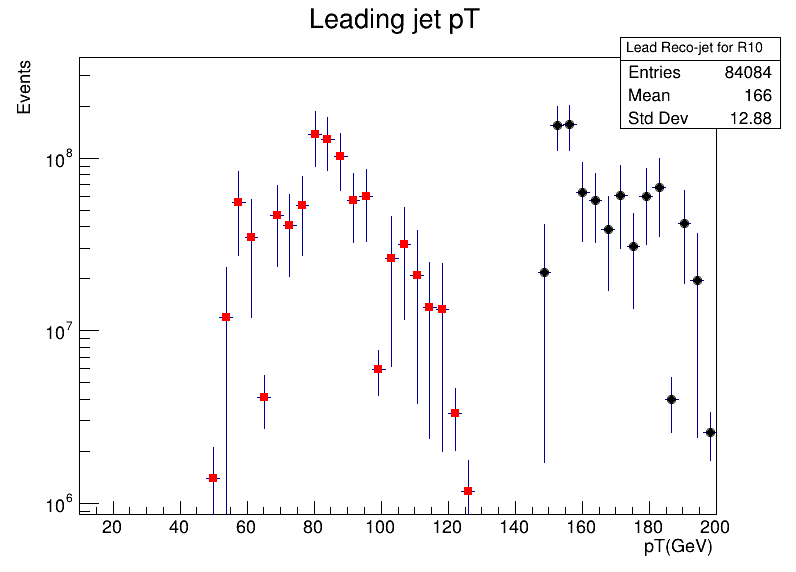

In [6]:
hist_leadrecoR10_pt->SetMarkerStyle(20);
hist_leadrecoR10_pt->Draw("");
hist_leadrecoR10_Trimmed_pt->SetMarkerColor(kRed);
hist_leadrecoR10_Trimmed_pt->SetMarkerStyle(21);
hist_leadrecoR10_Trimmed_pt->Draw("same");
canvas->SetLogy();
canvas->Draw();

## (b)

In [7]:
int nentries, nbytes, i;
nentries = (Int_t)tree->GetEntries(); 

for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);   
    if(truth_R10_pt->size()>0){
    hist_leadtruthR10_pt->Fill(truth_R10_pt->at(0)/1000.,evtw); 
    }
    if(truth_R10_Trimmed_pt->size()>0){
    hist_leadtruthR10_Trimmed_pt->Fill(truth_R10_Trimmed_pt->at(0)/1000.,evtw); 
    }
}

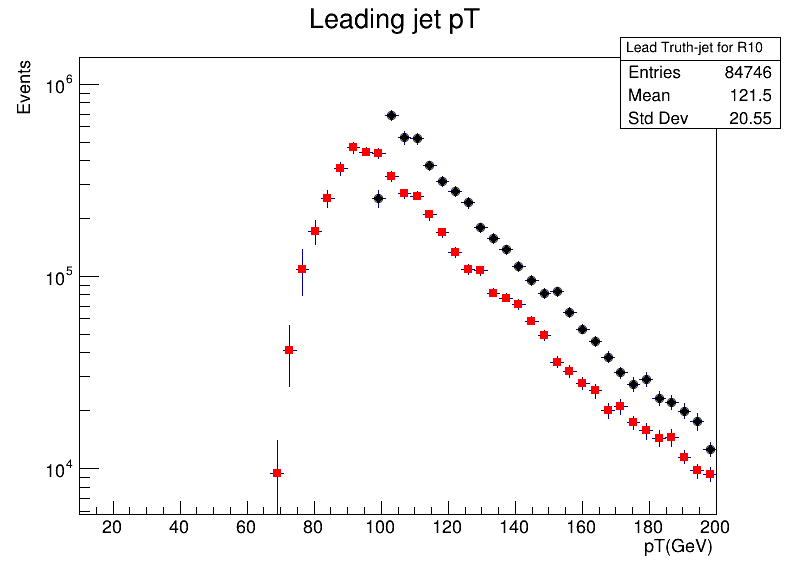

In [8]:
hist_leadtruthR10_pt->SetMarkerStyle(20);
hist_leadtruthR10_pt->Draw("");
hist_leadtruthR10_Trimmed_pt->SetMarkerColor(kRed);
hist_leadtruthR10_Trimmed_pt->SetMarkerStyle(21);
hist_leadtruthR10_Trimmed_pt->Draw("same");
canvas->SetLogy();
canvas->Draw();

## (c)

### Del procedimiento en los apartados (a) y (b) se puede observar que hay una diferencia de alrededor de 2 ordenes de magnitud en el numero de eventos truth con respecto a los reconstruidos; esto se debe, por supuesto, a la eficiencia de los metodos de reconstruccion y a todo el proceso de limpieza de datos que elimina una buena cantidad de ellos en comparación a los datos truth que se obtienen en el particle level a través de simulación. 

### Por otro lado, la grafica que compara los datos reconstruidos (reco) con y sin Trimmed muestra una discrepancia importante en la media para el momento transverso de los jets; esto puede deberse a que para R=1 se incluyen dentro del cono que conforma cada jet un mayor numero de elementos con un mayor pT que para R=0.4, elementos que provienen de procesos exteriores o contaminación.

### Ahora, para poder comparar truth pT vs reco pT a R=10 y por otro lado truth pT (Trimmed) vs reco pT (Trimmed) a R=10 se escalan las graficas ya que si no se escalan los datos de truth pT estan tan por encima de los datos reconstruidos que no es posible apreciarlos.

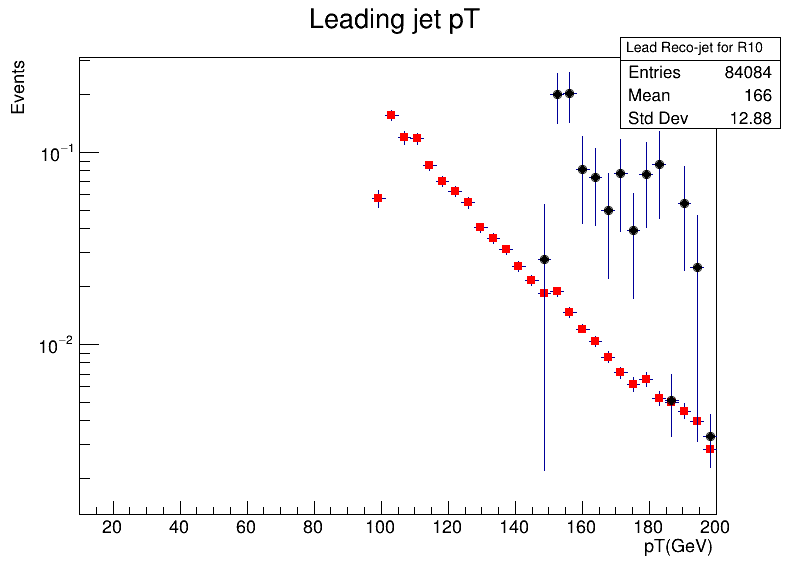

In [11]:
hist_leadtruthR10_pt->Scale(1/hist_leadtruthR10_pt->Integral());
hist_leadtruthR10_pt->SetMarkerStyle(21);
hist_leadtruthR10_pt->SetMarkerColor(kRed);
hist_leadtruthR10_pt->Draw("");
hist_leadrecoR10_pt->Scale(1/hist_leadrecoR10_pt->Integral());
hist_leadrecoR10_pt->SetMarkerStyle(20);
hist_leadrecoR10_pt->Draw("same");
canvas->SetLogy();
canvas->Draw();

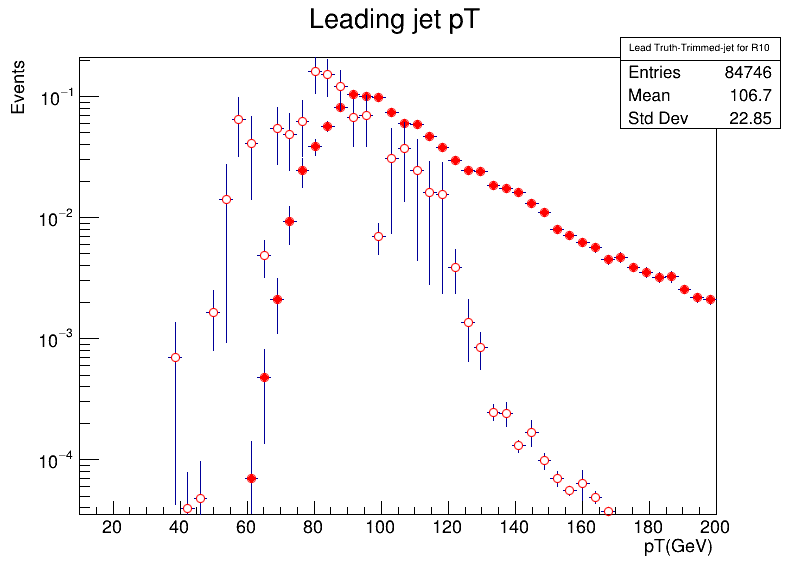

In [10]:
hist_leadtruthR10_Trimmed_pt->Scale(1/hist_leadtruthR10_Trimmed_pt->Integral());
hist_leadtruthR10_Trimmed_pt->SetMarkerStyle(20);
hist_leadtruthR10_Trimmed_pt->SetMarkerColor(kRed);
hist_leadtruthR10_Trimmed_pt->Draw("");
hist_leadrecoR10_Trimmed_pt->Scale(1/hist_leadrecoR10_Trimmed_pt->Integral());
hist_leadrecoR10_Trimmed_pt->SetMarkerStyle(24);
hist_leadrecoR10_Trimmed_pt->Draw("same");
canvas->SetLogy();
canvas->Draw();

### De estas graficas se puede observar que los datos a los que se les ha aplicado el proceso de "Trimming" se acercan mucho más en forma a los datos del particle level (truth) con una media de pT mucho mas cercana que los datos a los que no se les ha aplicado el "Trimming"

## (d)

In [5]:
int nentries, nbytes, i;
nentries = (Int_t)tree->GetEntries(); 

for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);   
    if(reco_R10_m->size()>0){
    hist_leadrecoR10_m->Fill(reco_R10_m->at(0)/1000.,evtw); 
    }
    if(reco_R10_Trimmed_m->size()>0){
    hist_leadrecoR10_Trimmed_m->Fill(reco_R10_Trimmed_m->at(0)/1000.,evtw); 
    }
}

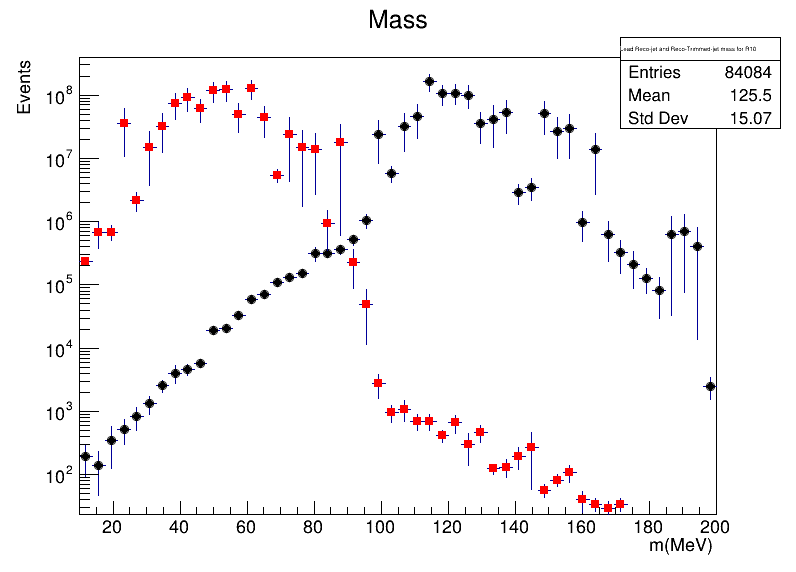

In [6]:
hist_leadrecoR10_m->SetMarkerStyle(20);
hist_leadrecoR10_m->Draw("");
hist_leadrecoR10_Trimmed_m->SetMarkerColor(kRed);
hist_leadrecoR10_Trimmed_m->SetMarkerStyle(21);
hist_leadrecoR10_Trimmed_m->Draw("same");
canvas->SetLogy();
canvas->Draw();

In [7]:
int nentries, nbytes, i;
nentries = (Int_t)tree->GetEntries(); 

for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);   
    if(truth_R10_m->size()>0){
    hist_leadtruthR10_m->Fill(truth_R10_m->at(0)/1000.,evtw); 
    }
    if(truth_R10_Trimmed_m->size()>0){
    hist_leadtruthR10_Trimmed_m->Fill(truth_R10_Trimmed_m->at(0)/1000.,evtw); 
    }
}

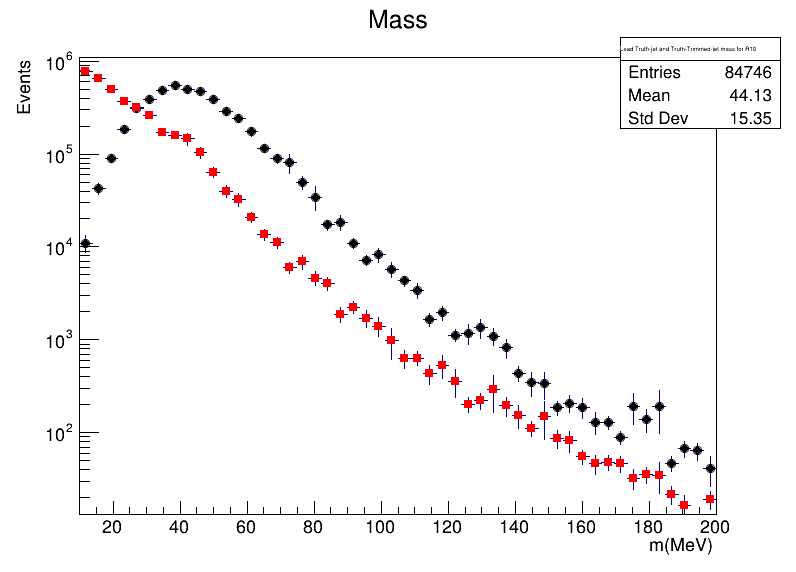

In [8]:
hist_leadtruthR10_m->SetMarkerStyle(20);
hist_leadtruthR10_m->Draw("");
hist_leadtruthR10_Trimmed_m->SetMarkerColor(kRed);
hist_leadtruthR10_Trimmed_m->SetMarkerStyle(21);
hist_leadtruthR10_Trimmed_m->Draw("same");
canvas->SetLogy();
canvas->Draw();

### Con la masa se observa un fenómeno muy similar al que se vio en el apartado anterior con el momento transverso (pT) el cual es lógico pensar que se explique por el mismo fenomeno. Por otro lado es de apreciar igualmente que en el caso de pT el proceso de "Trimming" ayuda a limpiar los datos de contaminación y ayuda a recomeriar medias más parecidas a las de los datos del particle level.